# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

units = "imperial"

count = 0

print("Beginning Data Retrieval")
print("---------------------------")

for city in cities:
    query = (f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}")
    response = requests.get(query).json()
    count += 1
    
    if count == 50:
        count = 0
        time.sleep(60)
    
    try:
        City.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    
        print(f'Processing {response["name"]}, city ID {response["id"]}')
        
    except:
        print("City not found. Skipping...")
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")
    

Beginning Data Retrieval
---------------------------
Processing Nanortalik, city ID 3421765
Processing Makakilo City, city ID 5850554
Processing Yangi Marg`ilon, city ID 1513491
Processing Bredasdorp, city ID 1015776
Processing Mataura, city ID 6201424
Processing Ust-Nera, city ID 2120048
Processing Rikitea, city ID 4030556
Processing Ushuaia, city ID 3833367
Processing Busselton, city ID 2075265
Processing Upernavik, city ID 3418910
Processing New Norfolk, city ID 2155415
Processing Sioux Lookout, city ID 6148373
Processing Castro, city ID 3466704
Processing Springfield, city ID 4409896
Processing Beroroha, city ID 1066831
Processing Chokwé, city ID 1048364
Processing San Patricio, city ID 4726521
Processing Nicoya, city ID 3622716
Processing Pisco, city ID 3932145
Processing Jamestown, city ID 5122534
Processing Butaritari, city ID 2110227
Processing Atambua, city ID 1651103
Processing Gilbués, city ID 3398931
Processing Te Anau, city ID 2181625
Processing Wanning, city ID 1791779
Pr

Processing Harper, city ID 2276492
Processing Camacha, city ID 2270385
City not found. Skipping...
Processing Qaanaaq, city ID 3831208
Processing Bogorodskoye, city ID 575521
Processing Maïné Soroa, city ID 2441447
Processing Tarko-Sale, city ID 1490085
Processing Yuncheng, city ID 1785738
Processing Klintsy, city ID 547475
Processing Wabash, city ID 4927746
Processing Atakpamé, city ID 2367886
Processing Cumberland, city ID 4462716
Processing Hofn, city ID 2630299
Processing San Jerónimo, city ID 3929611
Processing Abū Zabad, city ID 380348
Processing Collie, city ID 2074113
Processing Hong Kong, city ID 1819729
City not found. Skipping...
Processing Saint Anthony, city ID 5044290
City not found. Skipping...
City not found. Skipping...
Processing Bairiki Village, city ID 7601762
Processing Edgewater, city ID 4154205
Processing Lompoc, city ID 5367788
City not found. Skipping...
Processing Auki, city ID 2109701
Processing Biak, city ID 1637001
Processing Faanui, city ID 4034551
Process

Processing Taquari, city ID 3446783
Processing Duiwelskloof, city ID 1007514
Processing Tiznit Province, city ID 2527087
Processing Beloha, city ID 1067565
Processing Mocuba, city ID 1024312
Processing Kupang, city ID 2057087
Processing Moose Factory, city ID 6078372
Processing Tsagan Aman, city ID 481117
Processing Kasongo, city ID 213940
Processing Krivyanskaya, city ID 540797
Processing Forsytheganj, city ID 10722858
Processing Valentín Gómez Farías, city ID 3980683
Processing Belaya Gora, city ID 2126785
Processing Kiryat Gat, city ID 293842
Processing Camaçari, city ID 3468031
Processing Coracora, city ID 3942259
Processing San Julián, city ID 3985797
Processing Hays, city ID 4696788
Processing Tessalit, city ID 2449893
Processing Sosnovo-Ozerskoye, city ID 2016216
Processing Craig, city ID 5576064
Processing Kysyl-Syr, city ID 2021017
Processing College, city ID 5859699
Processing Manuk Mangkaw, city ID 1701394
Processing Magadan, city ID 2123628
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Put city data in data frame
weather_data = pd.DataFrame({"City": City,
                            "Lat": Lat,
                            "Lng": Lng,
                            "Max Temp": Max_Temp,
                            "Humidity": Humidity,
                            "Cloudiness": Cloudiness,
                            "Wind Speed": Wind_Speed,
                            "Country": Country,
                            "Date": Date})

#Write city data to csv file and export
weather_data.to_csv(output_data_file, index = False)

#Display data frame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,24.71,85,100,4.70,GL,1643403072
1,Makakilo City,21.3469,-158.0858,78.69,63,75,0.00,US,1643403301
2,Yangi Marg`ilon,40.4272,71.7189,36.82,41,100,6.91,UZ,1643403301
3,Bredasdorp,-34.5322,20.0403,63.72,72,54,6.91,ZA,1643403079
4,Mataura,-46.1927,168.8643,59.49,58,95,2.35,NZ,1643403301


In [7]:
#Generate descriptive statistics for data frame
weather_summary = weather_data.describe()

#Display summary
weather_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.672773,16.917524,48.337040,72.110333,61.327496,7.931121,1.643404e+09
std,33.174038,90.966872,31.490829,22.101919,39.876471,5.677618,2.714184e+02
min,-54.800000,-175.200000,-42.030000,11.000000,0.000000,0.000000,1.643403e+09
25%,-4.923250,-64.673850,24.800000,61.000000,18.500000,3.880000,1.643403e+09
50%,27.433300,21.050000,58.980000,77.000000,75.000000,6.530000,1.643404e+09
75%,49.947800,93.245400,75.620000,90.000000,100.000000,10.360000,1.643404e+09
max,78.218600,179.316700,96.670000,100.000000,100.000000,40.290000,1.643404e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
try:
    weather_data_clean = weather_data.loc[weather_data["Humidity"] < 100]
    weather_data_clean.describe()
    
except:
    weather_summary
    pass

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = list(np.where(weather_data["Humidity"] >= 100)[0])

humidity_indices

[38, 92, 95, 197, 350, 392, 424, 430, 486, 544]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index = humidity_indices, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,24.71,85,100,4.70,GL,1643403072
1,Makakilo City,21.3469,-158.0858,78.69,63,75,0.00,US,1643403301
2,Yangi Marg`ilon,40.4272,71.7189,36.82,41,100,6.91,UZ,1643403301
3,Bredasdorp,-34.5322,20.0403,63.72,72,54,6.91,ZA,1643403079
4,Mataura,-46.1927,168.8643,59.49,58,95,2.35,NZ,1643403301


In [11]:
#Format date from unix
clean_city_data["Date"] = clean_city_data["Date"].astype('int').astype("datetime64[s]")
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,24.71,85,100,4.70,GL,2022-01-28 20:51:12
1,Makakilo City,21.3469,-158.0858,78.69,63,75,0.00,US,2022-01-28 20:55:01
2,Yangi Marg`ilon,40.4272,71.7189,36.82,41,100,6.91,UZ,2022-01-28 20:55:01
3,Bredasdorp,-34.5322,20.0403,63.72,72,54,6.91,ZA,2022-01-28 20:51:19
4,Mataura,-46.1927,168.8643,59.49,58,95,2.35,NZ,2022-01-28 20:55:01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

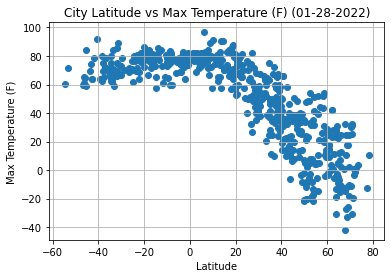

In [12]:
#Scatter plot function
def scatter(x_column, y_column, ylabel):
    x_values = clean_city_data[x_column]
    y_values = clean_city_data[y_column]
    plt.scatter(x_values,y_values)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"""City Latitude vs {ylabel} ({clean_city_data.iloc[0,8].strftime('%m-%d-%Y')})""")
    plt.grid()
    plt.savefig(f"../output_data/Cities_{y_column}.png")
    plt.show()

#Scatter plot of latitude vs max temperature
scatter("Lat", "Max Temp", "Max Temperature (F)")

#### Latitude vs. Max Temperature observations
The goal of the above plot is to visualize how temperature changes relative to latitude for a set of randomly selected cities, specifically how it changes as city latitude moves away from the equator. This graph shows a strong trend in the decrease of max temperature for cities north of the equator as they increase in latitude, but the temperature of cities south of the equator stay relatively more constant, regardless of distance from the equator. This disparity could be due to the seasonal differences in the hemispheres: it is winter in the nothern hemisphere, but summer in the southern. 

## Latitude vs. Humidity Plot

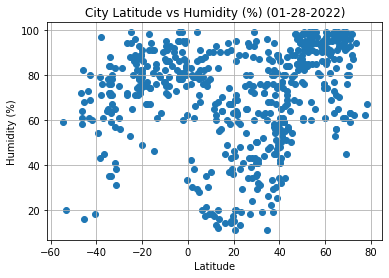

In [13]:
#Scatter plot of latitude versus humidity
scatter("Lat","Humidity", "Humidity (%)")

#### Latitude vs. Humidity observations
The goal of the above graph is to visualize the relationship between the percent humidity of a number of cities in relation to their latitude and look for any trends as one moves away from the equator. This graph does not show any observable trends between latitude and humidtity for the cities in this random data set. 

## Latitude vs. Cloudiness Plot 

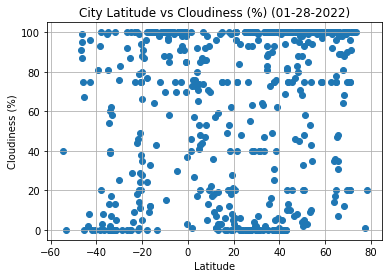

In [14]:
#Scatter plot of latitude versus cloudiness
scatter("Lat", "Cloudiness", "Cloudiness (%)")

The above graph looks at the cloudiness of cities in relation to their latitude, which allows us to look for trends in relation to a city's position from the equator. This graph does not show any observable trends between latitude and cloudiness for the cities in this random data set. 

## Latitude vs. Wind Speed Plot

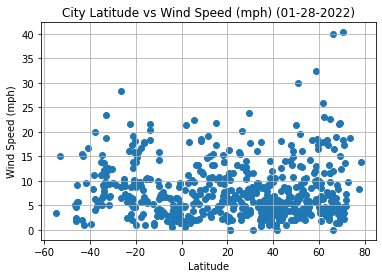

In [15]:
#Scatter plot of latitude versus wind speed
scatter("Lat", "Wind Speed", "Wind Speed (mph)")

This final scatterplot examines the relation of latitude to the wind speed of the cities in the data set, which allows to visualize trends in wind speed based on how close or far a city is to the equator. This graph does not show any observable trends between latitude and wind speed for the cities in this random data set - wind speed appears to largely be under 15 mph for most cities regardless of latitude. 

## Linear Regression

In [16]:
#Split clean_city_data by hemisphere - northern where lat > 0, southern where lat < 0
northern_city = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_city = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

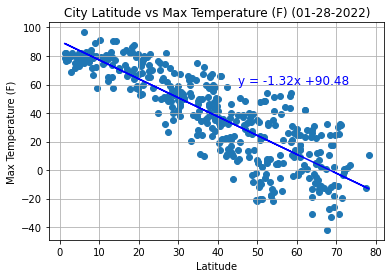

The r squared value is: 0.7072993307689616


In [17]:
#Linear regression function
def linreg(df, y_column, ylabel, x_loc, y_loc, hemisphere):
    #x- and y- values
    x_values = df["Lat"]
    y_values = df[y_column]
    
    #Get regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Plot scatter plot and linear regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"b")
    plt.annotate(line_eq, (x_loc,y_loc),fontsize=12,color="b")
    
    #Labels
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"""City Latitude vs {ylabel} ({df.iloc[0,8].strftime('%m-%d-%Y')})""")
    plt.grid()
    plt.savefig(f"../output_data/{hemisphere}_{y_column}.png")
    plt.show()
    
    #Print r-value
    print(f"The r squared value is: {rvalue**2}")
    
#Linear regression for max temp and latitude in northern hemisphere
linreg(northern_city, "Max Temp", "Max Temperature (F)", 45, 60, "Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

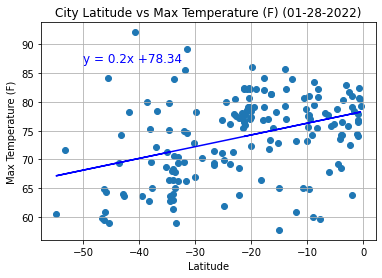

The r squared value is: 0.1436748460219956


In [20]:
#Southern hemisphere latitude vs max temp linear regression
linreg(southern_city, "Max Temp", "Max Temperature (F)", -50, 87, "Southern")

#### Data observations for linear regressions - latitude vs max temperature
These linear regressions are examining the correlation between max temperature of a city and how that does or does not change in relation to distance from the equator (latitude). The data for the northern cities has a moderate to strong correlation for the change in temperature as the distance from the equator increases. The data for the southern cities does not show a correlation for change in temperature moving away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

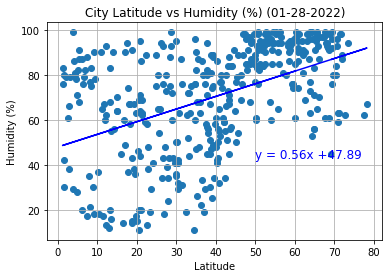

The r squared value is: 0.21708539704777682


In [21]:
#Northern hemisphere latitude vs humidity linear regression
linreg(northern_city, "Humidity", "Humidity (%)", 50, 43, "Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

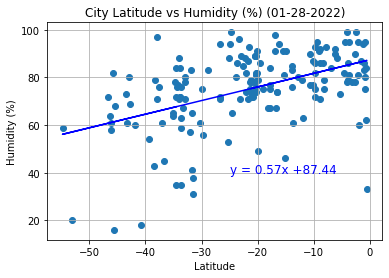

The r squared value is: 0.22646989325140712


In [24]:
#Southern hemisphere latitude vs humidity linear regression
linreg(southern_city, "Humidity", "Humidity (%)", -25, 40, "Southern")

#### Data observations for linear regressions - latitude vs humidity
These linear regressions are looking for a correlation between the humidity level of a city relative to its distance from the equator. Both the northern and southern data show minimal if any correlation between these two variables. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

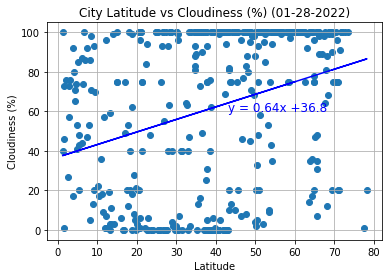

The r squared value is: 0.09879674671846735


In [26]:
#Northern hemisphere latitude vs cloudiness linear regression
linreg(northern_city, "Cloudiness", "Cloudiness (%)", 43, 60, "Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

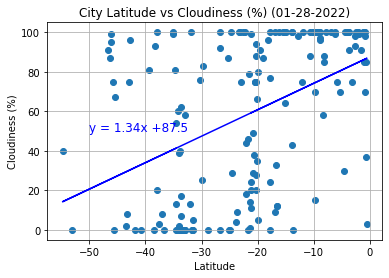

The r squared value is: 0.19736693291965038


In [29]:
#Southern hemisphere latitude vs cloudiness linear regression
linreg(southern_city, "Cloudiness", "Cloudiness (%)", -50, 50, "Southern")

#### Data observations for linear regressions - latitude vs cloudiness
These linear regressions are looking for a correlation between cloudiness and distance from the equator for the cities in the random data set. The data for both northern and southern cities do not show any correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

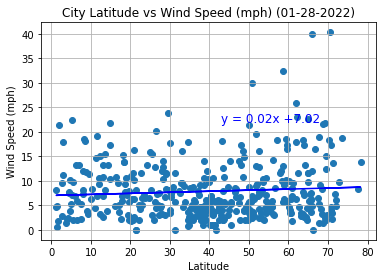

The r squared value is: 0.005277447664002664


In [30]:
#Northern hemisphere latitude vs wind speed linear regression
linreg(northern_city, "Wind Speed", "Wind Speed (mph)", 43, 22, "Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

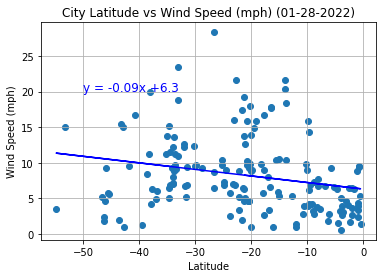

The r squared value is: 0.05499271253608171


In [34]:
# Southern hemisphere latitude vs wind speed linear regression
linreg(southern_city, "Wind Speed", "Wind Speed (mph)", -50, 20, "Southern")

#### Data observations for linear regressions - latitude vs wind speed
These linear regressions are examining any potential correlations between wind speed of cities and their distance from the equator. The data for both northern and southern cities do not show any correlation. 